### CSE 5243 - Introduction to Data Mining
## Homework 1: CRISP_DM Steps 2-3 (with Exploratory Data Analysis)
Replace the example information below with your real information:
- Semester: Spring 2024
- Instructor: Tom Bihari
- Section Wed/Fri 12:45PM
- Student Name: Erik Thompson
- Student Email: thompson.3624@osu.edu
- Student ID: 500367903

Based on CRISP-DM Template Version V11.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

### Assignment Overview
In this assignment, you will analyze a copy of the “Regensburg Pediatric Appendicitis” dataset.
- This dataset was pulled from: https://archive.ics.uci.edu/datasets?search=Regensburg%20Pediatric%20Appendicitis
- Dataset citation: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7711412.svg)](https://doi.org/10.5281/zenodo.7711412)

This assignment covers **steps two and three of the six steps** of the **CRISP-DM process model** (Data Understanding, Data Preparation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:
- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be valuable when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement
Assume that you are the Director of Medical Analytics for Buckeye Medical Center (BMC).  BMC wants to improve its Pediatric Appendicitis management practices.
- BMC has obtained data on pediatric appendicitis cases handled by Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021.
- BMC leadership has asked your team to analyze the data, and determine if it is suitable for developing analyses and models that would be effective in improving the management of pediatric appendicitis cases at BMC.
- Based on this, BMC may make improvements to specific aspects of their services, with a goal of improving BAI's overall customer satisfaction.

You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful.

**Assumption:** In the future, you will be creating a Classifiction model that predicts one or more of the "class" or "target" variables ('Management', 'Severity', 'Diagnosis').  For this assignment, assume you will be predicting the **Diagnosis** class variable.  You do not yet know the specific Classification algorithm or model you will use.  **That will come in a later assignment.**

### Things To Do
Complete **Sections 2 and 3** of CRISP-DM in this notebook (and the **Conclusion**). 
- **Data Understanding**: Perform Exploratory Data Analysis and gain an understanding of the contents and usefulness of the dataset. 
- **Data Preparation**: Clean up the data and save it for future use.

### Important Points
It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code), and comment your code, so others can understand and evaluate it.
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results. 

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding - **SKIP THIS!**
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them in the spaces below.
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
  - You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

**Stakeholders**
- Who are they?
- What are their needs?

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

**Deliverables**
- Report?
- Reusable code?
- Presentation?

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

**Time / Cost**
- What is the deadline or budget?

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

**Other Considerations**
- What other considerations, not covered above, might be relevant?

***
# Section: 2 - Data Understanding - **DO THIS!**
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **You may choose to do this separate first pass.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**
- Hint: Look at the "variable information" discussion below.

**Discussion:**

Fill in...

### **Load the Dataset.**

In [6]:
# See the Import in Python button here: https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis
#   and see: https://github.com/uci-ml-repo/ucimlrepo

# Install this package (uncomment and run one time, then re-comment it out)
#!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
 
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 

In [4]:
# # Miscellaneous things you could do...

# # Get X and y data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 

# # Show metadata 
display(regensburg_pediatric_appendicitis.metadata)

# # Show variable information 
display(regensburg_pediatric_appendicitis.variables)

{'uci_id': 938,
 'name': 'Regensburg Pediatric Appendicitis',
 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis',
 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv',
 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Tabular', 'Image'],
 'num_instances': 782,
 'num_features': 54,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['Management',

,name,role,type,demographic,description,units,missing_values
0,Age,Feature,Continuous,Age,Obtained from the date of birth,years,yes
1,BMI,Feature,Continuous,None,Measures body fat; patient's weight divided by...,None,yes
2,Sex,Feature,Categorical,Sex,Registered gender,None,yes
3,Height,Feature,Continuous,None,Patient's height,None,yes
4,Weight,Feature,Integer,None,Patient's weight,None,yes
5,Length_of_Stay,Feature,Integer,None,Length of the stay in the hospital,None,yes
6,Management,Target,Categorical,None,"(conservative, primary surgical, secondary sur...",None,yes
7,Severity,Target,Categorical,None,"(uncomplicated, complicated) Severity of appen...",None,yes
8,Diagnosis_Presumptive,Other,Binary,None,Patient's suspected diagnosis,None,yes
9,Diagnosis,Target,Binary,None,"Patient's diagnosis, histologically confirmed ...",None,yes


In [5]:
# Get the full dataframe, for use in the rest of this workbook
data_df = regensburg_pediatric_appendicitis.data.original
data_df.head(2)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN


**Discussion:**
***
Age is a Interval feature, because it is continuous, obtained from date of birth, and in units of years. 
BMI is an Interval feature, because it is continuous and measures body fat. 25 is not twice as fat as 12.5. 
Sex is nominal, because it is either male or female.
Height is a ratio feature, because it is continuous and 60 height is twice as high as 30 for example.
Weight is a ratio feature, because it is an integer estimate and 60 weight is twice as heavy as 30 weight.
Length of stay is a interval, because it is an integer estimate in days.
Management is nominal, because it can be conservative or another type.
Severity is nominal because it is a type that is either uncomplicated or other.
Diagnosis_Presumptive is nominal because it is a binary appendicitis or no appendicitis.
Diagnosis is nominal because it is a binary appendicitis or no appendicitis.
Alvarado Score is ordinal because it is an integer that is like a ranking of how likely appendicitis is present.
Paedriatic_Appendicitis_Score is ordinal because it is a integer ranking of how likely appendicitis is present.
Appendix_on_US is binary nominal feature because it is either yes or no, not a numerical ranking.
Appendix_Diameter is an integer ratio that is most likely in millimeters or other unit.
Migratory_Pain, Lower_Right_Abd_Pain, Contralateral_Rebound_Tenderness, Coughing_Pain, Nausea, Loss_of_Appetite are all nominal binary features.
Body_Temperature is a interval because it is a continuous temperature measurement.
WBC_Count is a ratio because it is a number of WBC per unit of blood.
Neutrophil_Percentage is a ratio because it is percent mature WBC.
Segmented_Neutrophils is a interval because it is most mature neutrophilic granulocytes present.
Neutrophilia is a nominal feature because it is categorical type.
RBC_Count is ratio because it is continuous and number of erythroctyes per unit of blood.
Hemoglobin is a interval because it is a continuous feature.
RDW is a interval because it is a continuous feature.
Thrombocyte_Count is a ratio because it is number of platelets in unit of blood.
Ketones_in_urine, RBC_in_Urine, WBC_in_Urine are all nominal because they are categorical.
CRP is interval because it is an integer representing protein produced by liver.
Dysuria is a nominal feature because it is binary.
Stool, Peritonitus, psoas_sign, Ipsilateral_rebound_tenderness, US_Performed are all nominal because they are categorical.
US_Number is an interval because it is an integer.
Free_Fluids, Appendix_wall_layer,Target_Sign, Appendicolith, Perfusion, Perforation, Surrounding_tissue_reaction, Appendicular_abscess, Abscess_location are all nominal because they are categorical.
Pathological_Lymph_Nodes is nominal because it is binary.
Lymph_nodes_location is nominal because it is categorical.
Bowel_Wall_Thickening, Conglomerate_of_Bowel_Loops are nominal because they are binary.
Ileus, Coprostatis, Meteorism, Enteritis, Gynecological_findings are nominal because they are categorical.

The data seems like it has enough features to make something useful out of it. Most features could have missing data according to meta-data. This could be a problem. The overall quality of the data is high quality, since it came from official hospital laboratory analysis. The currency of the data is very current from 2016 to 2021. Not very consistent data as every feature has missing values as yes. 

***

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [22]:
data_df.mean(numeric_only = True)

Age                               11.346451
BMI                               18.907012
Height                           148.017460
Weight                            43.172542
Length_of_Stay                     4.284062
Alvarado_Score                     5.921918
Paedriatic_Appendicitis_Score      5.253425
Appendix_Diameter                  7.762651
Body_Temperature                  37.404516
WBC_Count                         12.670683
Neutrophil_Percentage             71.791163
Segmented_Neutrophils             64.929630
RBC_Count                          4.799490
Hemoglobin                        13.380497
RDW                               13.180291
Thrombocyte_Count                285.252618
CRP                               31.386900
US_Number                        425.515789
dtype: float64

**Discussion:**

Average Age, BMI, Height and Weight all make sense in a pediatric setting. Average height in from cm to feet is 4.8 feet. 43.17 KG weight to pounds is around 95 pounds. Average body_Temperature is within healthy range. Neutrophil_percentage is slightly high at ~72 percent. Normal is 55 to 70 percent.

In [32]:
data_df.std(numeric_only = True)

Age                                3.529909
BMI                                4.385331
Height                            19.732016
Weight                            17.390984
Length_of_Stay                     2.574057
Alvarado_Score                     2.155972
Paedriatic_Appendicitis_Score      1.958456
Appendix_Diameter                  2.536671
Body_Temperature                   0.903678
WBC_Count                          5.366525
Neutrophil_Percentage             14.463656
Segmented_Neutrophils             15.085025
RBC_Count                          0.499012
Hemoglobin                         1.393271
RDW                                4.538774
Thrombocyte_Count                 72.494373
CRP                               57.433854
US_Number                        271.585211
dtype: float64

**Discussion:**
Low standard deviation in body temperature of 0.9. This means mostly healthy temperatures with only few going above. 

In [25]:
data_df['Diagnosis'].value_counts()

Diagnosis
appendicitis       463
no appendicitis    317
Name: count, dtype: int64

**Discussion:**
  
With over half of candidates diagnosed as with appendicitis, it is a biased sample 
compared to normal population.


In [30]:
data_df['Management'].value_counts()

Management
conservative                 483
primary surgical             270
secondary surgical            27
simultaneous appendectomy      1
Name: count, dtype: int64

**Discussion:**

To manage the symptoms, most patients had conservative management, meaning no surgery or invasive procedures were done. Less than half ~300 did have surgery. 

In [34]:
data_df['US_Performed'].value_counts()

US_Performed
yes    763
no      15
Name: count, dtype: int64

**Discussion:**
Vast majority of patients had ultrasound procedure performed. The high standard deviation of 271 on US_Number means there was great variation in results of ultrasound procedure.

In [15]:
#Count up all null values in 
bt = data_df['Body_Temperature'].isna()
count = 0
for b1 in bt:
    if b1:
        count+=1
print(str(count) + " null values in Body Temperature.")

7 null values in Body Temperature.


**Discussion:**
Not many missing values for temperature. Good feature to explore.

In [8]:
data_df.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900,425.515789
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854,271.585211
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


**Discussion:**
Age is highest count of non missing values. All other features have missing values then. 

In [35]:
data_df.quantile(q = [0, 0.01, .1, .25, .5, .75, .9, .99, 1], axis=0, numeric_only=True, interpolation='linear', method='single')

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
0.00,0.00,7.8300,53.00,3.960,1.0,0.0,0.0,2.700,26.900,2.600,27.200,32.00,3.6200,8.2,11.20,91.00,0.0,1.00
0.01,2.76,12.2224,94.82,12.934,2.0,2.0,2.0,3.491,36.000,4.375,38.182,32.53,3.9452,10.6,11.60,146.00,0.0,9.59
0.10,6.39,14.4240,121.25,22.000,2.0,3.0,3.0,4.670,36.500,6.500,50.300,42.50,4.3400,12.0,12.00,200.00,0.0,82.90
0.25,9.20,15.7250,137.00,29.500,3.0,4.0,4.0,6.000,36.800,8.200,61.400,54.50,4.5375,12.6,12.30,236.00,1.0,198.75
0.50,11.44,18.0600,149.65,41.400,3.0,6.0,5.0,7.500,37.200,12.000,75.500,64.50,4.7800,13.3,12.70,276.00,7.0,398.50
0.75,14.10,21.1800,163.00,54.000,5.0,8.0,7.0,9.100,37.900,16.200,83.600,77.50,5.0200,14.0,13.30,330.00,33.0,613.25
0.90,15.79,24.5960,171.00,66.300,7.0,9.0,8.0,11.000,38.600,19.400,87.800,83.00,5.2600,14.8,13.90,381.70,88.0,882.10
0.99,17.58,32.6966,183.00,89.660,14.0,10.0,10.0,14.030,39.726,27.350,93.244,89.41,5.7974,16.3,16.19,468.59,282.5,979.23
1.00,18.36,38.1600,192.00,103.000,28.0,10.0,10.0,17.000,40.200,37.700,97.700,91.00,14.0000,36.0,86.90,708.00,365.0,992.00


**Discussion:**
The distribution of Segmented_Neutrophils, RBC_Count, Hemoglobin, Thrombocyte_Count are all useful for learning what low values and high values are for these features. Neutrophils and thrombocytes are types of white blood cell. Length of stay 28.0 days may be outlier as mean was 4.2 days.

***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

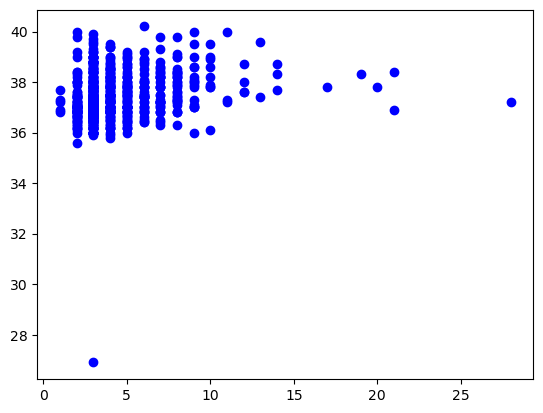

In [45]:
#Find the connection between length of stay and body temperature in a simple plot
plt.plot(data_df['Length_of_Stay'], data_df['Body_Temperature'], 'bo', scalex=True,scaley=True)

**Discussion:**
This distribution shows body temperature against length of stay. From this graph it is safe to say body temperature is a one time collection event rather than average temperature over the course of the stay. This is because it looks like there is no correlation between the two variables. Meta data only says temperature collected from rectum but does not specify if it is average value or one time at check in.

Text(0.5, 1.0, 'Box plot of Length of Hospital Stay and Diagnosis')

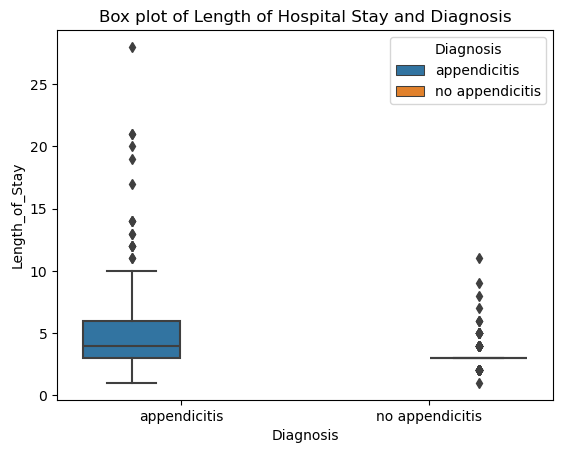

In [50]:
#plt.figure(figsize=(20,10))
#Find difference of length of stay between appendicitis and no appendicitis in a box plot.
#The box plot should show mean and outliers.
sb.boxplot(y=data_df['Length_of_Stay'], x=data_df['Diagnosis'], hue=data_df['Diagnosis'])
plt.title("Box plot of Length of Hospital Stay and Diagnosis")

**Discussion:**
This boxplot is interesting as it shows a higher mean length of stay for those with appendicitis. Much more higher outliers too with appendicitis staying for longer.

<Axes: xlabel='Length_of_Stay', ylabel='Alvarado_Score'>

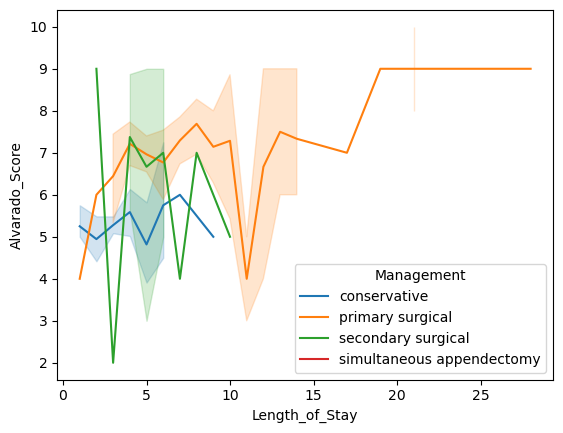

In [21]:
#Suppress warning about future update
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Show line distribution of length of stay vs alvarado scale 
#Seperated on management of how it was treated.
sb.lineplot(x=data_df['Length_of_Stay'], y=data_df['Alvarado_Score'], hue=data_df['Management'])

**Discussion:**
Conservative measures taken are associated with shorter hospital stay distribution and lower on alvarado scale than surgical approaches. Most secondary surgical approaches were around 5 days length of stay but varied in alvarado scale greatly. 

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

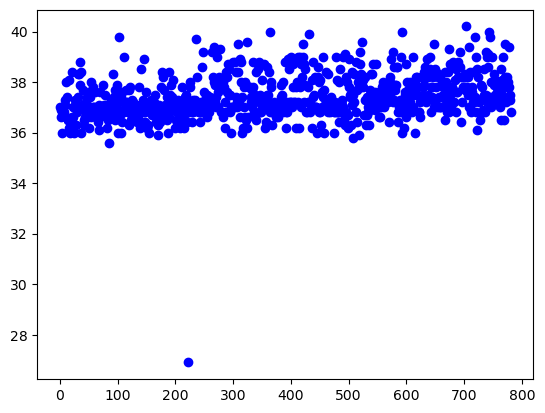

In [7]:
#Plotting out data points of body temperature helps
#get a better idea of the distribution and look for outliers.
plt.plot(data_df['Body_Temperature'], 'bo',scalex=True, scaley=True)


**Discussion:**

One outlier of body temperature at under 28 degrees C. Most points close to healthy temperature.

In [37]:
#Only choose three columns age, weight, length_of_stay
#This is because they are almost all non-na.
result = data_df[['Age', 'Weight', 'Length_of_Stay']]
#Keep = first means marks true only second and furthermore occurences.
result = result.duplicated(keep='first')
#Print out indices of duplicates.
for r in range(len(result)):
    if result[r]:
        print(str(r) + " index is a duplicate")

91 index is a duplicate
588 index is a duplicate


**Discussion:** 
2 duplicates found on the three columns checked. We can not check all the columns because of lots of missing data. So check these three columns that have almost all non missing data for duplicates. Remove these two rows in part three.

In [35]:
#Counts number of non na values in each feature.
data_df.count()

Age                                 781
BMI                                 755
Sex                                 780
Height                              756
Weight                              779
Length_of_Stay                      778
Management                          781
Severity                            781
Diagnosis_Presumptive               780
Diagnosis                           780
Alvarado_Score                      730
Paedriatic_Appendicitis_Score       730
Appendix_on_US                      777
Appendix_Diameter                   498
Migratory_Pain                      773
Lower_Right_Abd_Pain                774
Contralateral_Rebound_Tenderness    767
Coughing_Pain                       766
Nausea                              774
Loss_of_Appetite                    772
Body_Temperature                    775
WBC_Count                           776
Neutrophil_Percentage               679
Segmented_Neutrophils                54
Neutrophilia                        732


**Discussion:**
BMI is not 100% non-na values. This is possible since there are missing values for weight and height and therefore cannot be computed. US_Performed is almost 100% nonna, however many other dependent features are mostly null values. This could be because doctors did not analyze the ultrasound results. Ketones_in_urine, RBC_in_Urine, WBC_In_Urine are all around 580 count which means that many patients had urine tests.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
***

<Axes: xlabel='WBC_Count', ylabel='Body_Temperature'>

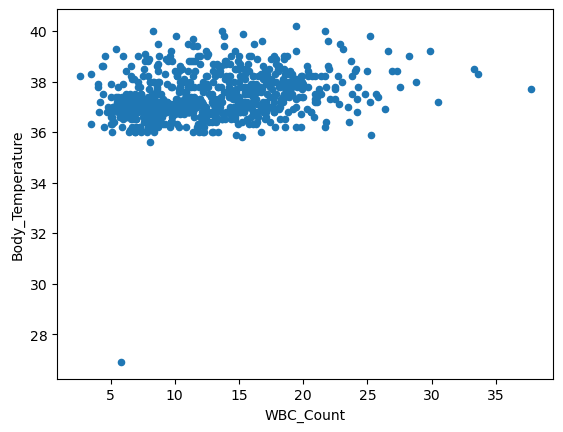

In [42]:
#Find relationship between body_Temperature and WBC_Count
df = data_df[['Body_Temperature', 'WBC_Count']]
df.plot.scatter(x='WBC_Count', y='Body_Temperature')

**Discussion:**

Can not tell much from this scatter plot. Looks like there could be a slight upwards trend of WBC_Count and Body_Temperature.

<Axes: xlabel='Body_Temperature', ylabel='WBC_Count'>

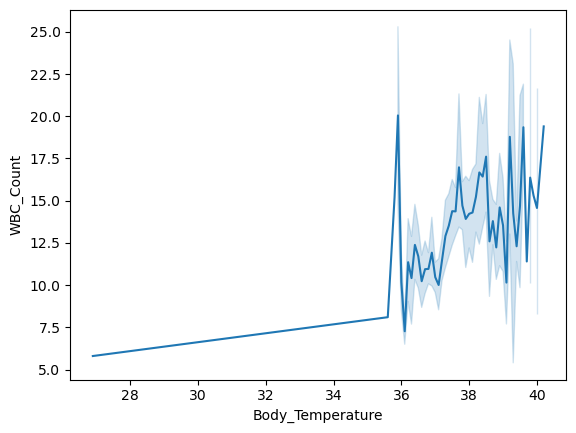

In [44]:
#Find a linear relationship between body temp. and WBC count.
sb.lineplot(x=data_df['Body_Temperature'], y=data_df['WBC_Count'])

**Discussion**:
The suspicion is confirmed. The line clearly shows an upwards trend of higher body temperature with more white blood cells. This must be an immune system reaction.

<Axes: >

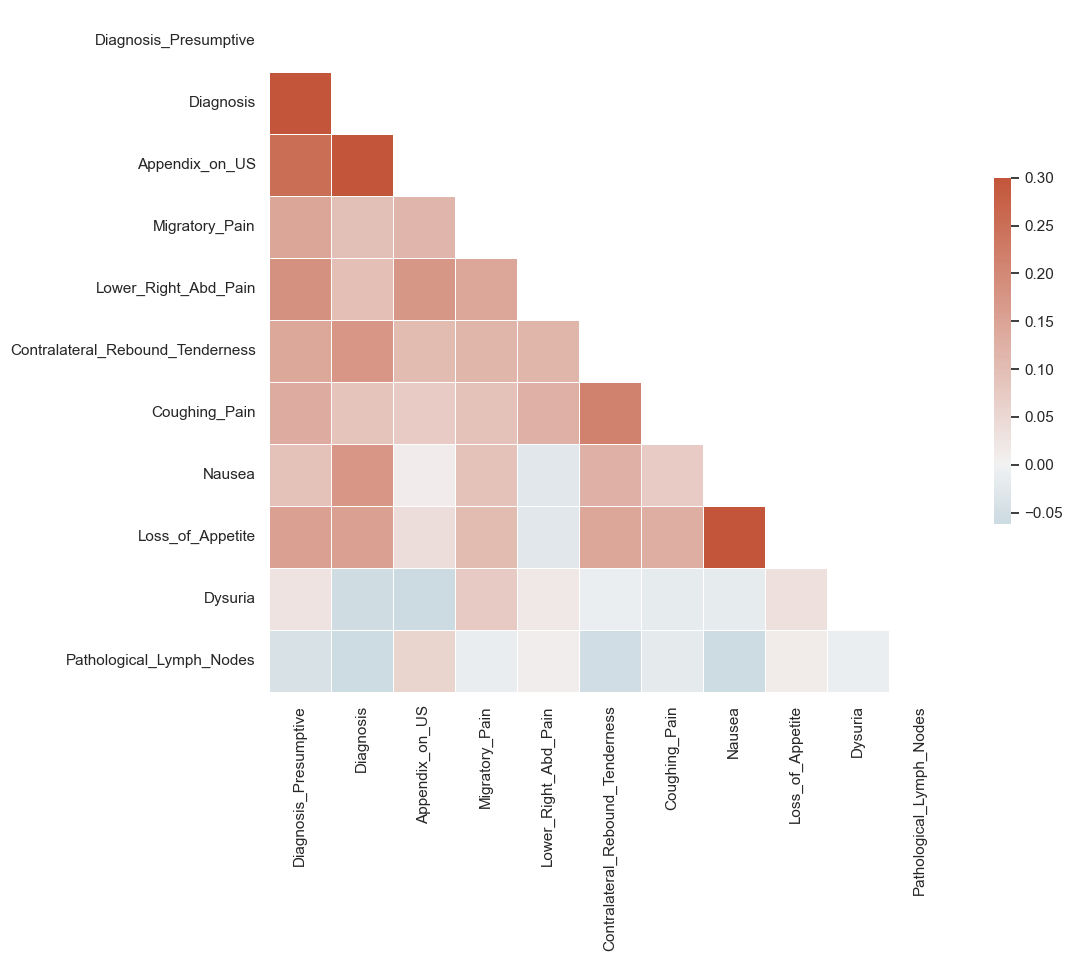

In [87]:
#Make a correlation matrix heat map for most binary features.
#Looking for strong correlation between binary features
#which are mostly symptoms and or diagnosis
sb.set_theme(style="white")
cols = ['Diagnosis_Presumptive', 'Diagnosis', 'Appendix_on_US', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 
                                'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite',
                                'Dysuria', 'Pathological_Lymph_Nodes']
df = data_df[cols]
#Convert app. to 1 no to 0 and yes to 1

a_map = {
    'appendicitis': 1,
    'yes': 1,
    'no': 0,
    'no appendicitis': 0,
    'NaN': 0
    
}
df = df.applymap(lambda s: a_map.get(s) if s in a_map else 0)
#print(df)
#Tried and failed different map methods on pandas dataframe.
'''
for i in range(len(df)):
    for i2 in range(2):
        if(df.loc(i2, i) == 'appendicitis'):
            df2.loc(i2, i)= 1
        else: 
            df2.loc(i2,i) =0
    for i2 in range(2, 12):
        if(df.loc(i2, i) == 'yes'):
            df2.loc(i2, i)= 1
        else: 
            df2.loc(i2,i) =0
'''
#df['Diagnosis_Presumptive'] = df['Diagnosis_Presumptive'].map(a_map)
#df['Diagnosis'] = df['Diagnosis'].map(a_map)
#df['Appendix_on_US'] = df['Appendix_on_US'].map(yn_map)
#df['Migratory_Pain'] = df['Migratory_Pain'].map(yn_map)
#df['Lower_Right_Abd_Pain'] = df['Lower_Right_Abd_Pain'].map(yn_map)
#df['Contralateral_Rebound_Tenderness'] = df['Contralateral_Rebound_Tenderness'].map(yn_map)
#df['Coughing_Pain'] = df['Coughing_Pain'].map(yn_map)
#df['Nausea'] = df['Nausea'].map(yn_map)
#df['Loss_of_Appetite'] = df['Loss_of_Appetite'].map(yn_map)
#df['Dysuria'] = df['Dysuria'].map(yn_map)
#df['Pathological_Lymph_Nodes'] = df['Pathological_Lymph_Nodes'].map(yn_map)

df = pd.DataFrame(data=df, columns=cols) 

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


**Discussion:**
Diagnosis and Diagnosis Presumptive of appendicitis have stronger correlation with most of the symptoms of it. Especially Contralateral rebound tenderness, nausea and loss of appetite. Nausea and loss of appetite have strong correlation since they are related in digestive system. Diagnosis and diagnosis presumptive have strong correlation to Appendix on US which is detectable appendix. This could mean appendix is larger than normal if it is detectable. Null values were set to 0 meaning there is correlation is lower than normal.

<Axes: xlabel='WBC_Count', ylabel='Alvarado_Score'>

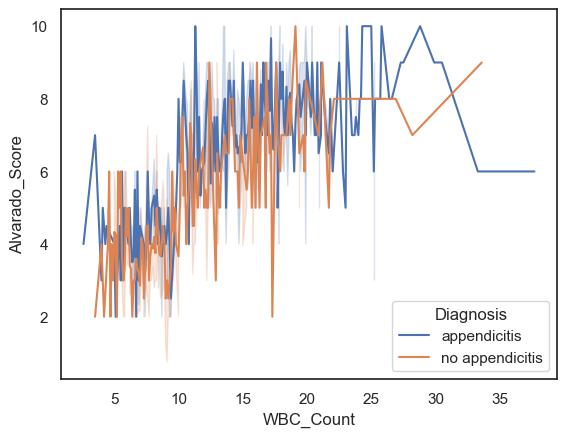

In [91]:
#Suppress warning about future update
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Find potential relationship between wbc count and alvarado score
#Seperated on presumptive diagnosis/ symptomatic or not.
sb.lineplot(x=data_df['WBC_Count'], y=data_df['Alvarado_Score'], hue=data_df['Diagnosis'])

**Discussion:**
There is a strong positive relationship between WBC and Alvarado_Score. Appendicitis has slightly higher rates of Alvarado Score per WBC_Count too over no appendicitis. 

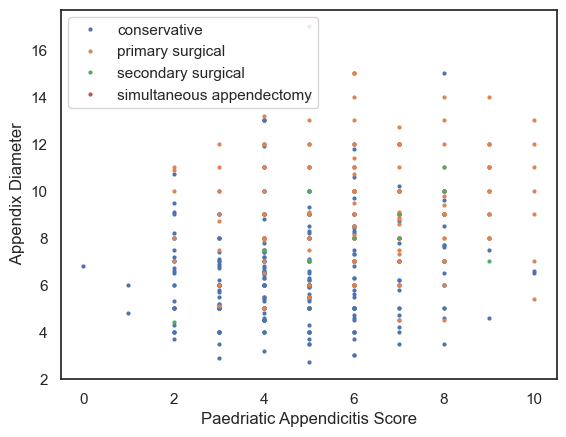

In [95]:
# EXAMPLE: Visualize the relationship between one specific pair of numerical variables, to look for potential relationship.
#Check to see if there is any difference in appendictis score, appendix diameter between
#management types.
groups = data_df.groupby('Management')
for name, group in groups:
    plt.plot(group.Paedriatic_Appendicitis_Score, group.Appendix_Diameter, marker='o', linestyle='', markersize=2, label=name)
plt.xlabel('Paedriatic Appendicitis Score')
plt.ylabel(' Appendix Diameter')
plt.legend()

Primary surgical management seems to have higher appendix diameter than conservative approaches. 

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

**Discussion:**
Many of the relationships can be explained by how the immune system works. When the body creates more white blood cells (WBC) it is responding to some kind of disease or ailment. It also increases body temperature while producing more WBC to kill bacteria. Bacteria and other microbes have a harder time reproducing at higher temperatures. 

Presumptive Diagnosis of Appendicitis is correlated with many of the symptoms of appendicitis because that is what the admitting patient is diagnosised with at the hospital. The doctor would record these symptoms tenderness, detectable appendix, abdominal pain and more and in general historically these symptoms are associated with the ailment. 

Appendictis had higher rates of alvarado score per white blood cell count, because there are more serious symptoms with a diagnosis of appendicitis versus no appendicitis. With higher white blood cell count the immune system is reacting to an ailment. Those ailments are most likely symptoms that are recorded as either 1 or 2 points of alvarado score. That explains the linear relationship between alvarado score and WBC count.

With larger appendix diameter, the seriousness of appendicitis could be considered worse. So surgery is necessary for the larger appendix. Paedatric appendicitis score varied and did not see any relationship. Larger appendix diameter seemed to be defining feature of surgery or no surgery.

***
# Section: 3 - Data Preparation - **DO THIS!**
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice.  Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes.  So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [7]:
#Create copy for cleaning
clean_data_df = data_df.copy()

#clean_data_df['Diagnosis_Presumptive'].value_counts()
#Replace all diagnosis not appendicitis specific to other.
for i in range(len(clean_data_df['Diagnosis_Presumptive'])):
    s = clean_data_df['Diagnosis_Presumptive'][i]
    if s != 'appendicitis' and s != 'no appendicitis':
        clean_data_df['Diagnosis_Presumptive'].replace(to_replace = s, value = 'other', inplace = True)



**Discussion:**
There were many diagnosises not in english. Around twenty of them. So it was possible to replace these other values with 'other' to be more generic.

In [134]:
clean_data_df = clean_data_df.dropna(subset=['Diagnosis'])
clean_data_df = clean_data_df.reset_index(drop=True)

**Discussion:**
Diagnosis is an important class feature that has missing values of data. These missing values should be dropped in order to preserve accuracy.

In [135]:
clean_data_df.drop_duplicates(subset= ['Age', 'Weight', 'Length_of_Stay'], keep='first', inplace=True)  # This removes all but one copy of the records that are completely identical.
clean_data_df = clean_data_df.reset_index(drop=True)

**Discussion:**
It was found that there are two duplicates in an earlier section. Drop these to preserve data precision.

In [147]:
#Calculate BMI for missing values.
clean_data_df['BMI'].fillna((clean_data_df['Weight'] / ((clean_data_df['Height']/100)*(clean_data_df['Height']/100))), inplace=True)

Weight
50.0    23
33.0    16
45.0    16
39.0    13
54.0    13
        ..
26.7     1
57.3     1
65.1     1
47.2     1
23.9     1
Name: count, Length: 268, dtype: int64

**Discussion:**
If there are any missing BMI values with height and weight filled in, it is possible to fill in the data then.

[51, 64, 545, 624]
[145, 303, 676]
[638, 656, 676]
[221, 704]
[33, 563, 601, 681, 693, 763]


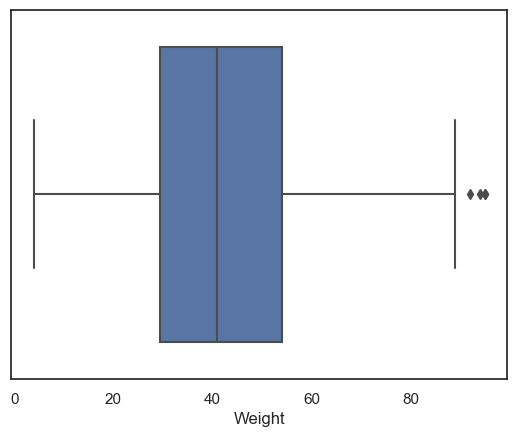

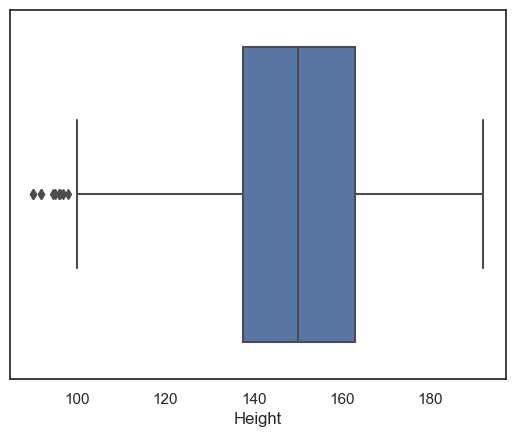

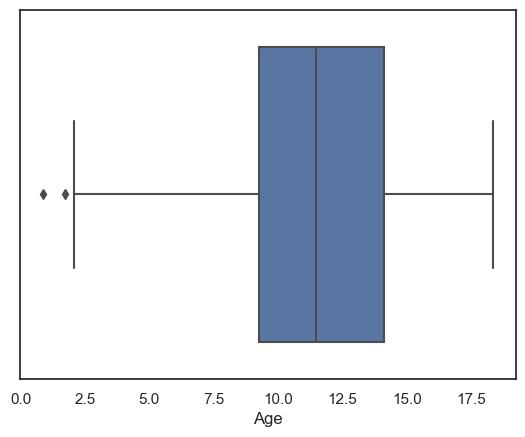

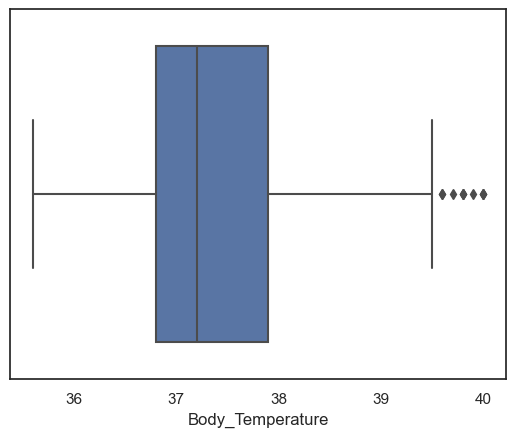

<Axes: xlabel='WBC_Count'>

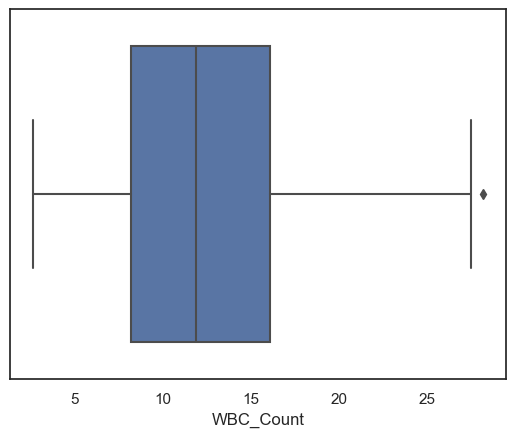

In [213]:
#Run this only one time to drop outliers once.
def find_outliers(df1, att):
    std = df1[att].std()
    mean = df1[att].mean()
    ans = []
    for i in range(len(df1[att])):
        if df1[att][i] < mean - (std*3) or df1[att][i] > mean + (std*3):
            ans.append(i)
    return ans
# print and drop the outliers for some numerical attributes.
#print(clean_data_df['WBC_Count'][681])
outliers_indices = []
for att in ['Weight', 'Height', 'Age', 'Body_Temperature', 'WBC_Count']:
    outliers_indices = find_outliers(clean_data_df, att)
    print(outliers_indices)
    clean_data_df[att] = clean_data_df[att].drop(labels=outliers_indices)
    #clean_data_df = clean_data_df.reset_index(drop=True)
#print(clean_data_df['WBC_Count'][681])

sb.boxplot(x=clean_data_df['Weight'])
plt.show()
sb.boxplot(x=clean_data_df['Height'])
plt.show()
sb.boxplot(x=clean_data_df['Age'])
plt.show()
sb.boxplot(x=clean_data_df['Body_Temperature'])
plt.show()
sb.boxplot(x=clean_data_df['WBC_Count'])

**Discussion:**
Here we find outliers and drop them from the data set. (Replacing with NaN). Outliers are defined as anything outside three standard deviations of mean. Only run this once to find outliers one time. Box plots show clean data without outliers.

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

In [11]:

# Remove the attributes
clean_data_df.drop('Segmented_Neutrophils', axis=1, inplace=True)
# Remove the attributes
clean_data_df.drop('Dysuria', axis=1, inplace=True)
# Remove the attributes
clean_data_df.drop('Pathological_Lymph_Nodes', axis=1, inplace=True)

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900,425.515789
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854,271.585211
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


**Discussion:**

Segmented Neutrophils had only 54 records not null values. This is not enough to make a representive sample of data. 
Dysuria and Pathological Lymph Nodes had low correlation with other symptoms of Appendicitis. No correlation with diagnosis of Appendicitis.

***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

In [13]:
#Fever is binary feature that is yes if >38 degrees celcius. No otherwise.
clean_data_df['Fever'] = clean_data_df['Body_Temperature'] >= 38
clean_data_df['Fever'].value_counts()

Fever
False    594
True     188
Name: count, dtype: int64

**Discussion:**

Another potential sign of illness is elevated body temperature in the ranges above 38 degrees celcius is considered a fever. 188 patients had a fever temperature range which is considered sick and dangerous.

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

**Discussion:**

I did not choose to transform existing attributes. No features stood out as needed to be normalized or standardized. The hospital was in Europe so it does not make sense to change units of measure to Farenheit, Feet, and Pounds.

***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

**Discussion:**

I did not see a reason to trim the dataset. Most numerical records are around 781 non null values which is a large enough sample, but not too large that it takes long to data analysis. Outliers were removed.

***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

**Discussion:**

I did not see a need to perform any other steps.

***
# Section: 4 - Modeling - **DO THIS!**
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**

Fill in...

***
# Section: 5 - Evaluation - **DO THIS!**
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

Fill in...

***
# Section: 6 - Deployment - **SKIP THIS!**
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions - **DO THIS!**
- What did you learn from this exercise?
***

**Discussion:**

